In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

# deep learning libraries
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import cv2
from glob import glob


import warnings
warnings.filterwarnings('ignore')


In [2]:
!nvidia-smi

Sun Nov 27 08:34:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [4]:
train_path="/content/drive/MyDrive/Final Year Project/Dataset_Practice_Braintumor_Multiclass_detect/Training";

In [5]:
test_path="/content/drive/MyDrive/Final Year Project/Dataset_Practice_Braintumor_Multiclass_detect/Testing";

In [6]:
import os

In [7]:
print(os.listdir(train_path));
print(os.listdir(test_path));

['meningioma_tumor', 'pituitary_tumor', 'glioma_tumor', 'no_tumor']
['glioma_tumor', 'pituitary_tumor', 'no_tumor', 'meningioma_tumor']


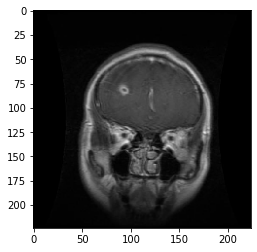

In [8]:
from tensorflow.keras.preprocessing.image import load_img
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
image=load_img(train_path+'/glioma_tumor/gg (794).jpg',target_size=(224,224));
imshow(image)

In [9]:
dataset_path=os.listdir(train_path)
tumor_types=os.listdir(train_path)
print("tumor types:",tumor_types)

print("Types of tumor count: ",len(dataset_path))

tumor types: ['meningioma_tumor', 'pituitary_tumor', 'glioma_tumor', 'no_tumor']
Types of tumor count:  4


In [10]:
list1=[]
for i in tumor_types:
    all_types=os.listdir(train_path+'/'+i)
    
    for a in all_types:
        list1.append((i,str(train_path+'/'+i)+'/'+a))

In [11]:
len(list1)

1803

In [12]:
dataset_path2=os.listdir(test_path)
tumor_types_test=os.listdir(test_path)
print("tumor types:",tumor_types_test)

print("Types of tumor count: ",len(dataset_path2))

tumor types: ['glioma_tumor', 'pituitary_tumor', 'no_tumor', 'meningioma_tumor']
Types of tumor count:  4


In [13]:
list2=[]
for i in tumor_types_test:
    all_types_test=os.listdir(test_path+'/'+i)
    
    for a in all_types_test:
        list2.append((i,str(test_path+'/'+i)+'/'+a))

In [14]:
len(list2)

394

In [15]:
list1[0:5]

[('meningioma_tumor',
  '/content/drive/MyDrive/Final Year Project/Dataset_Practice_Braintumor_Multiclass_detect/Training/meningioma_tumor/m2 (79).jpg'),
 ('meningioma_tumor',
  '/content/drive/MyDrive/Final Year Project/Dataset_Practice_Braintumor_Multiclass_detect/Training/meningioma_tumor/m2 (129).jpg'),
 ('meningioma_tumor',
  '/content/drive/MyDrive/Final Year Project/Dataset_Practice_Braintumor_Multiclass_detect/Training/meningioma_tumor/m1(118).jpg'),
 ('meningioma_tumor',
  '/content/drive/MyDrive/Final Year Project/Dataset_Practice_Braintumor_Multiclass_detect/Training/meningioma_tumor/m3 (47).jpg'),
 ('meningioma_tumor',
  '/content/drive/MyDrive/Final Year Project/Dataset_Practice_Braintumor_Multiclass_detect/Training/meningioma_tumor/m2 (170).jpg')]

In [16]:
list2[0:5]

[('glioma_tumor',
  '/content/drive/MyDrive/Final Year Project/Dataset_Practice_Braintumor_Multiclass_detect/Testing/glioma_tumor/image(17).jpg'),
 ('glioma_tumor',
  '/content/drive/MyDrive/Final Year Project/Dataset_Practice_Braintumor_Multiclass_detect/Testing/glioma_tumor/image(16).jpg'),
 ('glioma_tumor',
  '/content/drive/MyDrive/Final Year Project/Dataset_Practice_Braintumor_Multiclass_detect/Testing/glioma_tumor/image(19).jpg'),
 ('glioma_tumor',
  '/content/drive/MyDrive/Final Year Project/Dataset_Practice_Braintumor_Multiclass_detect/Testing/glioma_tumor/image(15).jpg'),
 ('glioma_tumor',
  '/content/drive/MyDrive/Final Year Project/Dataset_Practice_Braintumor_Multiclass_detect/Testing/glioma_tumor/image(1).jpg')]

In [17]:
tumor_df_train=pd.DataFrame(data=list1,columns=['tumor type','image'])
print(tumor_df_train.head())

         tumor type                                              image
0  meningioma_tumor  /content/drive/MyDrive/Final Year Project/Data...
1  meningioma_tumor  /content/drive/MyDrive/Final Year Project/Data...
2  meningioma_tumor  /content/drive/MyDrive/Final Year Project/Data...
3  meningioma_tumor  /content/drive/MyDrive/Final Year Project/Data...
4  meningioma_tumor  /content/drive/MyDrive/Final Year Project/Data...


In [18]:
tumor_df_train.iloc[0,1]

'/content/drive/MyDrive/Final Year Project/Dataset_Practice_Braintumor_Multiclass_detect/Training/meningioma_tumor/m2 (79).jpg'

In [19]:
tumor_df_test=pd.DataFrame(data=list2,columns=['tumor type','image'])
print(tumor_df_test.head())

     tumor type                                              image
0  glioma_tumor  /content/drive/MyDrive/Final Year Project/Data...
1  glioma_tumor  /content/drive/MyDrive/Final Year Project/Data...
2  glioma_tumor  /content/drive/MyDrive/Final Year Project/Data...
3  glioma_tumor  /content/drive/MyDrive/Final Year Project/Data...
4  glioma_tumor  /content/drive/MyDrive/Final Year Project/Data...


In [20]:
tumor_df_test.iloc[0,1]

'/content/drive/MyDrive/Final Year Project/Dataset_Practice_Braintumor_Multiclass_detect/Testing/glioma_tumor/image(17).jpg'

In [21]:
tumor_df_train.describe()

,tumor type,image
count,1803,1803
unique,4,1803
top,glioma_tumor,/content/drive/MyDrive/Final Year Project/Data...
freq,526,1


In [22]:
tumor_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803 entries, 0 to 1802
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tumor type  1803 non-null   object
 1   image       1803 non-null   object
dtypes: object(2)
memory usage: 28.3+ KB


In [23]:
tumor_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tumor type  394 non-null    object
 1   image       394 non-null    object
dtypes: object(2)
memory usage: 6.3+ KB


In [24]:
tumor_count=tumor_df_train['tumor type'].value_counts()
print("Tumor of each category: ")
print(tumor_count)

Tumor of each category: 
glioma_tumor        526
meningioma_tumor    510
pituitary_tumor     479
no_tumor            288
Name: tumor type, dtype: int64


In [25]:
import cv2
path=train_path+'/';

im_size=224

images=[]
labels=[]

for i in tumor_types:
    data_path=path+str(i)
    filenames=[i for i in os.listdir(data_path)]
    
    for f in filenames:
        img=cv2.imread(data_path+ '/'+ f)
        img=cv2.resize(img,(im_size,im_size))
        images.append(img)
        labels.append(i)

In [26]:
len(images)

1803

In [27]:
len(labels)

1803

In [28]:
import cv2
path=test_path+'/';

im_size=224

images_test=[]
labels_test=[]

for i in tumor_types_test:
    data_path=path+str(i)
    filenames=[i for i in os.listdir(data_path)]
    
    for f in filenames:
        img=cv2.imread(data_path+ '/'+ f)
        img=cv2.resize(img,(im_size,im_size))
        images_test.append(img)
        labels_test.append(i)

In [29]:
len(images_test)

394

In [30]:
len(labels_test)

394

In [31]:
images=np.array(images)

images=images.astype('float32')/255.0
images.shape

(1803, 224, 224, 3)

In [32]:
images_test=np.array(images_test)

images_test=images_test.astype('float32')/255.0
images_test.shape

(394, 224, 224, 3)

In [33]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
y=tumor_df_train['tumor type'].values


In [34]:
y.size

1803

In [35]:
y[4]

'meningioma_tumor'

In [36]:
labels[4]

'meningioma_tumor'

In [37]:
len(labels)

1803

In [38]:
train_label_encoder=LabelEncoder()
y_train=train_label_encoder.fit_transform(y)
print(y[4])
print(y_train[4])

meningioma_tumor
1


In [39]:
y=tumor_df_test['tumor type'].values

In [40]:
y.size

394

In [41]:
y[2]

'glioma_tumor'

In [42]:
labels_test[2]

'glioma_tumor'

In [43]:
len(labels_test)

394

In [44]:
test_label_encoder=LabelEncoder()
y_test=test_label_encoder.fit_transform(y)
print(y[2])
print(y_test[2])

glioma_tumor
0


In [45]:
print(y_train.size)
print(y_test.size)


1803
394


In [46]:
y_train=y_train.reshape(-1,1)
o=OneHotEncoder(categories='auto')
y_train=o.fit_transform(y_train).toarray()
y_train.shape

(1803, 4)

In [47]:
y_test=y_test.reshape(-1,1)
o=OneHotEncoder(categories='auto')
y_test=o.fit_transform(y_test).toarray()
y_test.shape

(394, 4)

In [48]:
images.shape

(1803, 224, 224, 3)

In [49]:
images_test.shape

(394, 224, 224, 3)

In [50]:
def vggupdated(input_tensor=None,classes=4):
    img_rows,img_cols=224,224
    img_channels=3
    
    img_dim=(img_rows,img_cols,img_channels)
    
    img_input=Input(shape=img_dim)
    
    #block1
    x=Conv2D(64,(3,3),activation='relu',padding='same',name='block1_conv1')(img_input)
    x=Conv2D(64,(3,3),activation='relu',padding='same',name='block1_conv2')(x)
    x=MaxPooling2D((2,2),strides=(2,2),name='block1_pool')(x)
    
    #block2
    x=Conv2D(128,(3,3),activation='relu',padding='same',name='block2_conv1')(x)
    x=Conv2D(128,(3,3),activation='relu',padding='same',name='block2_conv2')(x)
    x=MaxPooling2D((2,2),strides=(2,2),name='block2_pool')(x)
    
    #block3
    x=Conv2D(256,(3,3),activation='relu',padding='same',name='block3_conv1')(x)
    x=Conv2D(256,(3,3),activation='relu',padding='same',name='block3_conv2')(x)
    x=Conv2D(256,(3,3),activation='relu',padding='same',name='block3_conv3')(x)
    x=MaxPooling2D((2,2),strides=(2,2),name='block3_pool')(x)
    
    #block4
    x=Conv2D(512,(3,3),activation='relu',padding='same',name='block4_conv1')(x)
    x=Conv2D(512,(3,3),activation='relu',padding='same',name='block4_conv2')(x)
    x=Conv2D(512,(3,3),activation='relu',padding='same',name='block4_conv3')(x)
    x=MaxPooling2D((2,2),strides=(2,2),name='block4_pool')(x)
    
    #block5
    x=Conv2D(512,(3,3),activation='relu',padding='same',name='block5_conv1')(x)
    x=Conv2D(512,(3,3),activation='relu',padding='same',name='block5_conv2')(x)
    x=Conv2D(512,(3,3),activation='relu',padding='same',name='block5_conv3')(x)
    x=MaxPooling2D((2,2),strides=(2,2),name='block5_pool')(x)
    
    #classification block
    x=Flatten(name='flatten')(x)
    x=Dense(4096,activation='relu',name='fc1')(x)
    x=Dense(4096,activation='relu',name='fc2')(x)   

    x=Dense(classes,activation='softmax',name='predictions')(x)
    
    model=Model(inputs=img_input,outputs=x,name='vgg')
    
    return model
    

In [51]:
model=vggupdated(classes=4)

In [52]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
r = model.fit(
images,
y_train,
epochs=10,batch_size=16
)
#50 epochs & 32 batch size

Epoch 1/10
113/113 [==============================] - 41s 251ms/step - loss: 1.3713 - accuracy: 0.2768
Epoch 2/10
113/113 [==============================] - 26s 229ms/step - loss: 1.3646 - accuracy: 0.2917
Epoch 3/10
113/113 [==============================] - 27s 235ms/step - loss: 1.3628 - accuracy: 0.2784
Epoch 4/10
113/113 [==============================] - 27s 235ms/step - loss: 1.3635 - accuracy: 0.2879
Epoch 5/10
113/113 [==============================] - 26s 233ms/step - loss: 1.3648 - accuracy: 0.2845
Epoch 6/10
113/113 [==============================] - 27s 235ms/step - loss: 1.3641 - accuracy: 0.2840
Epoch 7/10
113/113 [==============================] - 27s 236ms/step - loss: 1.3634 - accuracy: 0.2812
Epoch 8/10
113/113 [==============================] - 26s 233ms/step - loss: 1.3636 - accuracy: 0.2812
Epoch 9/10
113/113 [==============================] - 26s 233ms/step - loss: 1.3630 - accuracy: 0.2845
Epoch 10/10
113/113 [==============================] - 26s 233ms/step - l

In [54]:
model.save('/content/drive/MyDrive/Final Year Project/'+'vgg16_colab_try_2.h5')

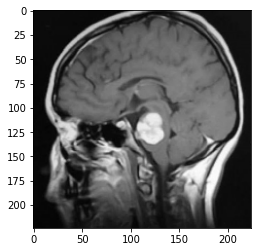

In [55]:
from tensorflow.keras.preprocessing.image import load_img
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow

img=load_img(test_path+'/glioma_tumor/image(17).jpg',target_size=(224,224))
imshow(img)

In [56]:

img=np.array(img)

img=img.reshape((1,img.shape[0],img.shape[1],img.shape[2]))
img=preprocess_input(img)
img

array([[[[ -92.939, -105.779, -112.68 ],
         [ -92.939, -105.779, -112.68 ],
         [ -92.939, -105.779, -112.68 ],
         ...,
         [ -85.939,  -98.779, -105.68 ],
         [ -85.939,  -98.779, -105.68 ],
         [ -85.939,  -98.779, -105.68 ]],

        [[ -92.939, -105.779, -112.68 ],
         [ -92.939, -105.779, -112.68 ],
         [ -92.939, -105.779, -112.68 ],
         ...,
         [ -85.939,  -98.779, -105.68 ],
         [ -85.939,  -98.779, -105.68 ],
         [ -85.939,  -98.779, -105.68 ]],

        [[ -92.939, -105.779, -112.68 ],
         [ -92.939, -105.779, -112.68 ],
         [ -92.939, -105.779, -112.68 ],
         ...,
         [ -85.939,  -98.779, -105.68 ],
         [ -85.939,  -98.779, -105.68 ],
         [ -85.939,  -98.779, -105.68 ]],

        ...,

        [[ -95.939, -108.779, -115.68 ],
         [ -96.939, -109.779, -116.68 ],
         [ -96.939, -109.779, -116.68 ],
         ...,
         [ -93.939, -106.779, -113.68 ],
         [ -93.939, -1

In [57]:
model.summary()

Model: "vgg"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0       

In [58]:
predval=model.predict(img)

1/1 [==============================] - 1s 855ms/step


In [78]:
predval

array([[8.62496018e-01, 1.00895874e-01, 1.04360217e-04, 3.65037434e-02]],
      dtype=float32)

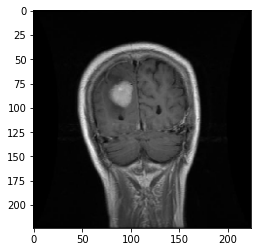

In [60]:
img=load_img(tumor_df_train.iloc[0,1],target_size=(224,224))
imshow(img)

In [61]:
predictions = []

for i in tumor_df_test.index:
  img=tf.keras.preprocessing.image.load_img(tumor_df_train.iloc[i,1])
  img = tf.keras.preprocessing.image.img_to_array(img)
  img = tf.keras.preprocessing.image.smart_resize(img, (224, 224))
  img = tf.reshape(img, (-1, 224,224, 3))
  prediction = model.predict(img)
  predictions.append(np.argmax(prediction))


1/1 [==============================] - 0s 18ms/step


In [62]:
len(predictions)

394

In [64]:
from PIL import Image

In [70]:
list3=[]
for i in tumor_df_test.index:
  Img = Image.open(tumor_df_test.iloc[i,1])
  list3.append(Img.filename)

In [71]:
list3[1]

'/content/drive/MyDrive/Final Year Project/Dataset_Practice_Braintumor_Multiclass_detect/Testing/glioma_tumor/image(16).jpg'

In [72]:
len(list3)

394

In [73]:

my_submission = pd.DataFrame({'image_id': list3, 'label':  predictions})
my_submission.to_csv('submission.csv', index=False)

# Submission file ouput
print("Submission File: \n---------------\n")
print(my_submission.head()) # Displaying first five predicted output

Submission File: 
---------------

                                            image_id  label
0  /content/drive/MyDrive/Final Year Project/Data...      0
1  /content/drive/MyDrive/Final Year Project/Data...      0
2  /content/drive/MyDrive/Final Year Project/Data...      0
3  /content/drive/MyDrive/Final Year Project/Data...      0
4  /content/drive/MyDrive/Final Year Project/Data...      0


In [76]:
my_submission.iloc[310:320]

,image_id,label
310,/content/drive/MyDrive/Final Year Project/Data...,0
311,/content/drive/MyDrive/Final Year Project/Data...,0
312,/content/drive/MyDrive/Final Year Project/Data...,0
313,/content/drive/MyDrive/Final Year Project/Data...,0
314,/content/drive/MyDrive/Final Year Project/Data...,0
315,/content/drive/MyDrive/Final Year Project/Data...,0
316,/content/drive/MyDrive/Final Year Project/Data...,0
317,/content/drive/MyDrive/Final Year Project/Data...,0
318,/content/drive/MyDrive/Final Year Project/Data...,0
319,/content/drive/MyDrive/Final Year Project/Data...,0
